In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn import base
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, FunctionTransformer

In [3]:
sklearn.__version__

'0.23.1'

 - https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics
 - https://en.wikipedia.org/wiki/Lineweaver%E2%80%93Burk_plot
 - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline
 - https://github.com/scikit-learn/scikit-learn/issues/17950

In [4]:
def MichaelisMenten(S, vmax=1e-2, Km=5e-3):
    return vmax*S/(Km+S)

In [5]:
Slin = np.linspace(1e-4, 1e-1, 101)
vSlin = MichaelisMenten(Slin)

In [6]:
df = pd.DataFrame({'S': Slin, 'v': vSlin})
df.tail()

,S,v
96,0.096004,0.009505
97,0.097003,0.009510
98,0.098002,0.009515
99,0.099001,0.009519
100,0.100000,0.009524


In [7]:
def inverse(x):
    return 1/x

In [8]:
transformer = FunctionTransformer(func=inverse, inverse_func=inverse, check_inverse=True)

In [9]:
scaler = Pipeline(steps=[('Inverser', transformer), ('Standardizer', StandardScaler())])

In [10]:
model = Pipeline([('InverserStandardizer', base.clone(scaler)), ('OLS', LinearRegression())])

In [11]:
regressor = TransformedTargetRegressor(regressor=model, transformer=base.clone(scaler))

In [12]:
mmreg = base.clone(regressor)

In [13]:
mmreg.fit(df[['S']], df['v'])

TransformedTargetRegressor(regressor=Pipeline(steps=[('InverserStandardizer',
                                                      Pipeline(steps=[('Inverser',
                                                                       FunctionTransformer(func=<function inverse at 0x0000017B4A02D288>,
                                                                                           inverse_func=<function inverse at 0x0000017B4A02D288>)),
                                                                      ('Standardizer',
                                                                       StandardScaler())])),
                                                     ('OLS',
                                                      LinearRegression())]),
                           transformer=Pipeline(steps=[('Inverser',
                                                        FunctionTransformer(func=<function inverse at 0x0000017B4A02D288>,
                                            

In [14]:
mmreg.score(df[['S']], df['v'])

1.0

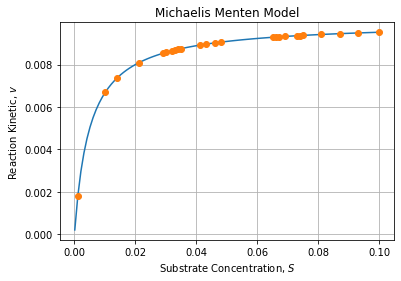

In [15]:
dfs = df[['S']].sample(25)
fig, axe = plt.subplots()
axe.plot(df['S'], df['v'])
axe.plot(dfs['S'], mmreg.predict(dfs[['S']]), 'o')
axe.set_title("Michaelis Menten Model")
axe.set_xlabel('Substrate Concentration, $S$')
axe.set_ylabel('Reaction Kinetic, $v$')
axe.grid()

In [16]:
def get_constants(reg):
    ols = reg.regressor_.named_steps['OLS']
    xScaler = reg.regressor_.named_steps["InverserStandardizer"].named_steps["Standardizer"]
    yScaler = reg.transformer_.named_steps["Standardizer"]
    a1, b1 = ols.coef_[0], ols.intercept_
    xm, sx = xScaler.mean_[0], xScaler.scale_[0]
    ym, sy = yScaler.mean_[0], yScaler.scale_[0]
    a0 = a1*(sy/sx)
    b0 = b1 - a0*xm + ym
    vmax = 1/b0
    Km = vmax*a0
    return vmax, Km

In [17]:
vmax, Km = get_constants(mmreg)
vmax, Km

(0.010000000000000004, 0.005000000000000003)

In [18]:
sklearn.show_versions()


System:
    python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\jlanderc\Anaconda3\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
          pip: 20.0.2
   setuptools: 45.2.0.post20200210
      sklearn: 0.23.1
        numpy: 1.18.1
        scipy: 1.4.1
       Cython: 0.29.15
       pandas: 1.0.5
   matplotlib: 3.1.3
       joblib: 0.14.1
threadpoolctl: 2.1.0

Built with OpenMP: True
